In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [57]:
data = pd.read_csv('../data/Customer-Churn.csv')

In [58]:
df = data.copy()  # Create a copy of the original data for manipulation

In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].isna().sum()

11

In [60]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = 0

In [61]:
df.drop(columns=['customerID'], inplace=True)

In [62]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [64]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [65]:
df_encoded['AvgChargesPerMonth'] = (
    df_encoded['TotalCharges'] / (df_encoded['tenure'] + 1)
)


df_encoded['IsLongTermCustomer'] = (df_encoded['tenure'] > 12).astype(int)

In [66]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgChargesPerMonth,IsLongTermCustomer
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,True,False,True,False,14.925000,0
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,True,False,False,False,False,True,53.985714,1
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,True,False,False,True,36.050000,0
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,40.016304,1
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,True,False,True,False,50.550000,0


In [67]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [68]:
X =  df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [70]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Logistic Regression

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])


In [72]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[749 286]
 [ 81 293]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    max_depth=None
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [75]:
y_pred_rf = rf.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[929 106]
 [192 182]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='recall',  # prioritize churn recall
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [78]:
y_pred_tuned = grid.predict(X_test)
print(classification_report(y_test, y_pred_tuned))


              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.55      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



C:\Users\POWER\AppData\Local\Temp\ipykernel_1552\2345544191.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


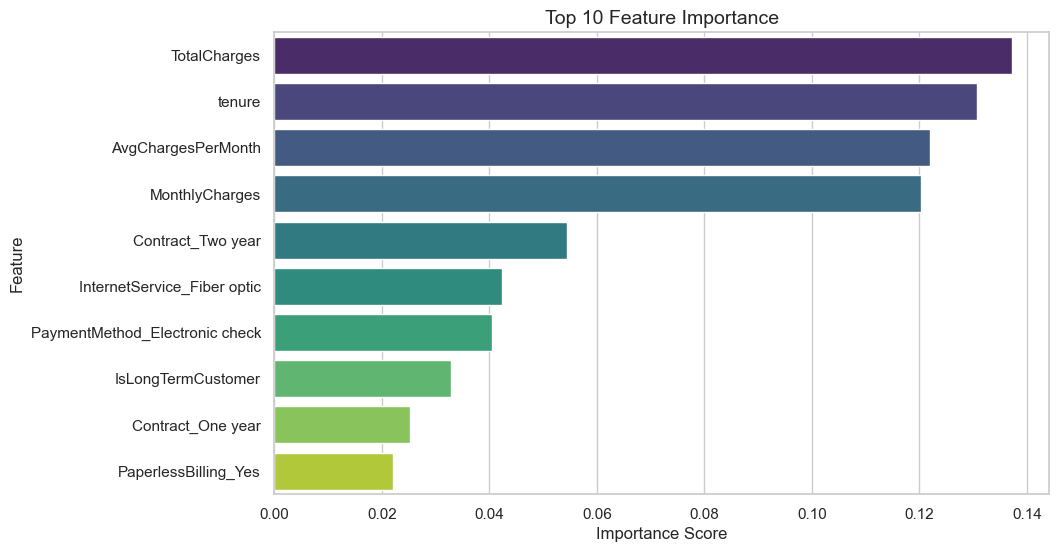

In [79]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

top_features = feature_importance.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

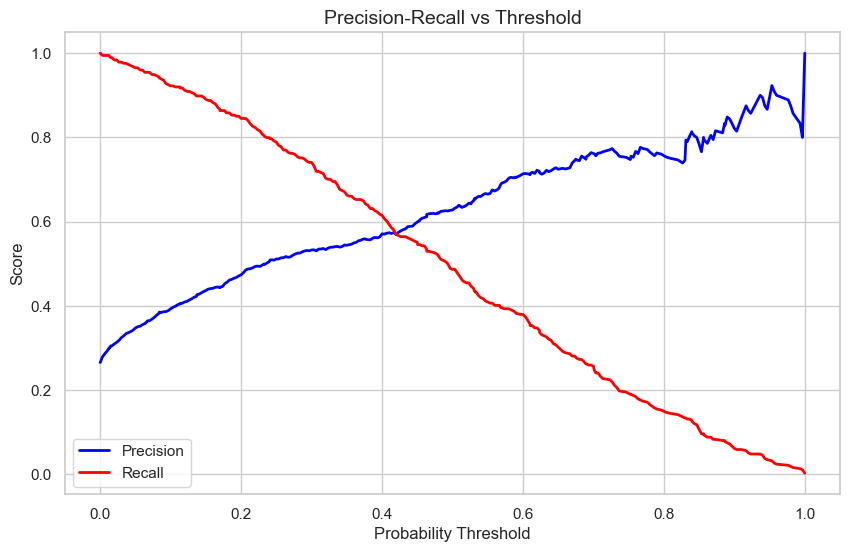

In [80]:
from sklearn.metrics import precision_recall_curve, confusion_matrix

probs = rf.predict_proba(X_test)[:, 1]  # probability for churn=1
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', color='red', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision-Recall vs Threshold', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

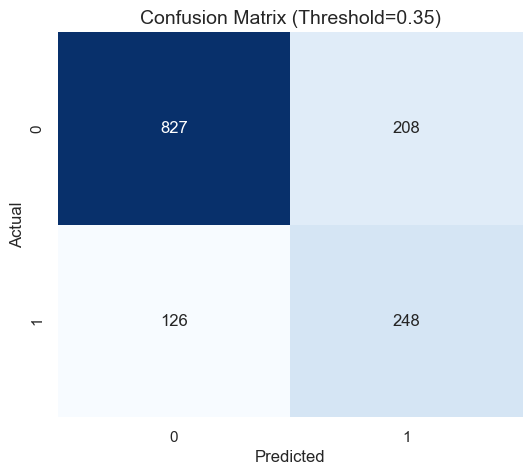

In [81]:
y_pred_thresh = (probs >= 0.35).astype(int)
cm = confusion_matrix(y_test, y_pred_thresh)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Threshold=0.35)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



XGBoost Model(A)

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [84]:
# Calculate imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight


2.768561872909699

In [85]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [86]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



XGBoost Model(B)

In [87]:
probs_xgb = xgb.predict_proba(X_test)[:, 1]

# Try a lower threshold
threshold = 0.35
y_pred_xgb_thresh = (probs_xgb >= threshold).astype(int)

print(classification_report(y_test, y_pred_xgb_thresh))


              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1035
           1       0.47      0.86      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.81      0.71      0.72      1409



XGBoost was selected as the final model after comparing multiple classifiers. The model achieved a churn recall of 79%, meaning it successfully identified the majority of customers likely to churn. Although precision decreased slightly, this trade-off is acceptable in a churn-reduction context where missing a churner is more costly than contacting a retained customer.